<a href="https://colab.research.google.com/github/olyadiya/Intro_to_ML/blob/main/visuals_hw_31_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание

## ЗАДАНИЕ 1: Базовые графики matplotlib

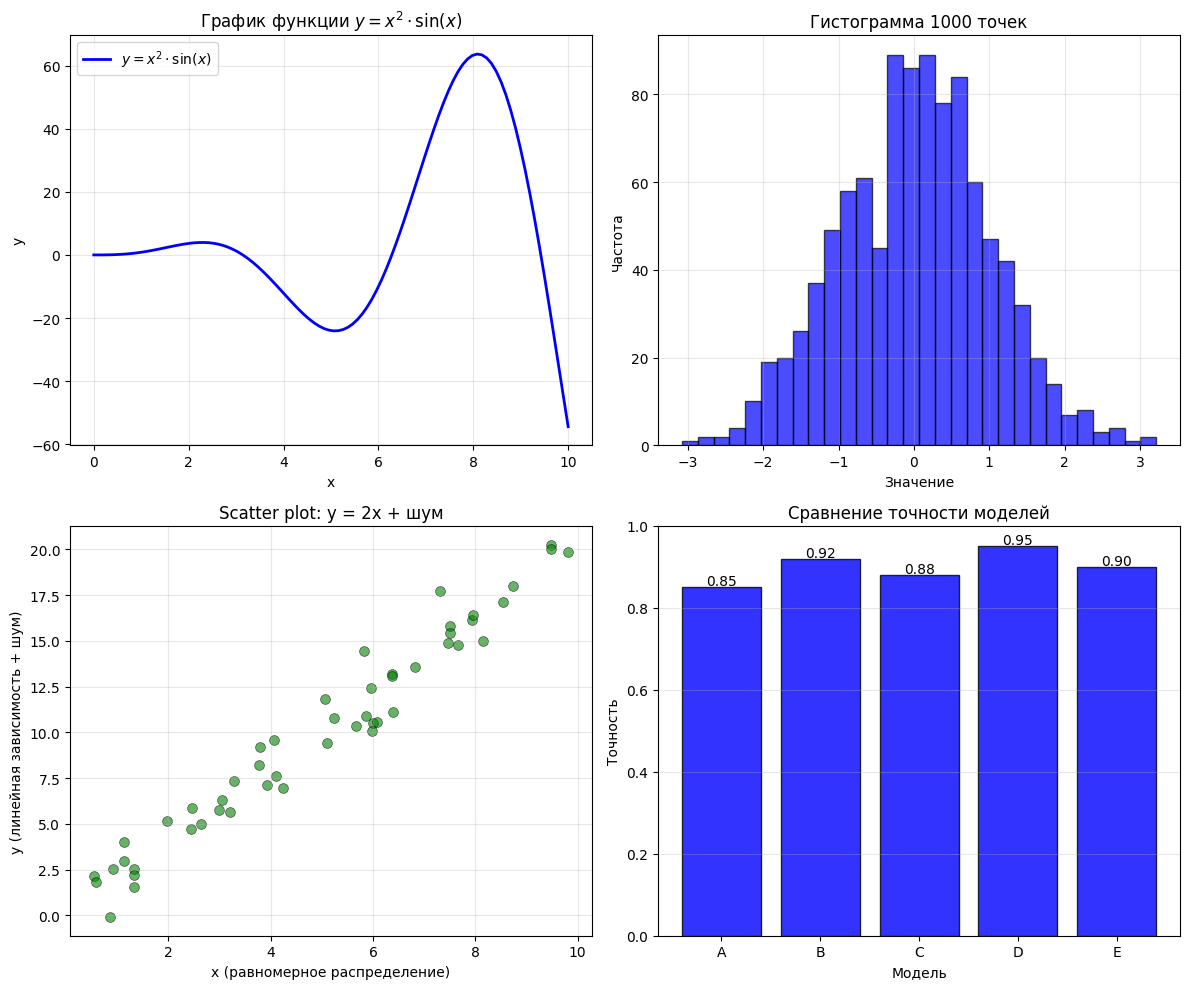

In [1]:
# Создайте фигуру с 4 subplots (2x2):
# 1. Линейный график функции y = x^2 * sin(x) на интервале [0, 10]
#    Добавьте заголовок, подписи осей, сетку, легенду
# 2. Гистограмма 1000 случайных точек из нормального распределения
#    Настройте количество bins=30, добавьте заголовок
# 3. Scatter plot: 50 точек (x - равномерное распределение, y = 2x + шум)
#    Настройте размер точек, прозрачность, цвет
# 4. Bar chart: сравнение 5 разных моделей по точности
#    accuracy = [0.85, 0.92, 0.88, 0.95, 0.90]
#    Добавьте значения над столбцами

import numpy as np
import matplotlib.pyplot as plt

# Создаем фигуру с 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Линейный график y = x^2 * sin(x)
ax = axes[0, 0]
x = np.linspace(0, 10, 100)
y = x**2 * np.sin(x)
ax.plot(x, y, 'b-', linewidth=2, label='$y = x^2 \\cdot \\sin(x)$')
ax.set_title('График функции $y = x^2 \\cdot \\sin(x)$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True, alpha=0.3)
ax.legend()

# 2. Гистограмма нормального распределения
ax = axes[0, 1]
data = np.random.normal(0, 1, 1000)
ax.hist(data, bins=30, color='blue', alpha=0.7, edgecolor='black')
ax.set_title('Гистограмма 1000 точек')
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
ax.grid(True, alpha=0.3)

# 3. Scatter plot: y = 2x + шум
ax = axes[1, 0]
x = np.random.uniform(0, 10, 50)
y = 2 * x + np.random.normal(0, 1, 50)
ax.scatter(x, y, s=50, alpha=0.6, c='green', edgecolors='black', linewidth=0.5)
ax.set_title('Scatter plot: y = 2x + шум')
ax.set_xlabel('x (равномерное распределение)')
ax.set_ylabel('y (линейная зависимость + шум)')
ax.grid(True, alpha=0.3)

# 4. Bar chart: точность моделей
ax = axes[1, 1]
models = ['A', 'B', 'C', 'D', 'E']
accuracy = [0.85, 0.92, 0.88, 0.95, 0.90]
bars = ax.bar(models, accuracy, alpha=0.8, color = 'blue', edgecolor='black')
ax.set_title('Сравнение точности моделей')
ax.set_xlabel('Модель')
ax.set_ylabel('Точность')
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3, axis='y')

# Добавляем значения над столбцами
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{acc:.2f}', ha='center')

plt.tight_layout()
plt.show()

## ЗАДАНИЕ 2: Seaborn визуализации

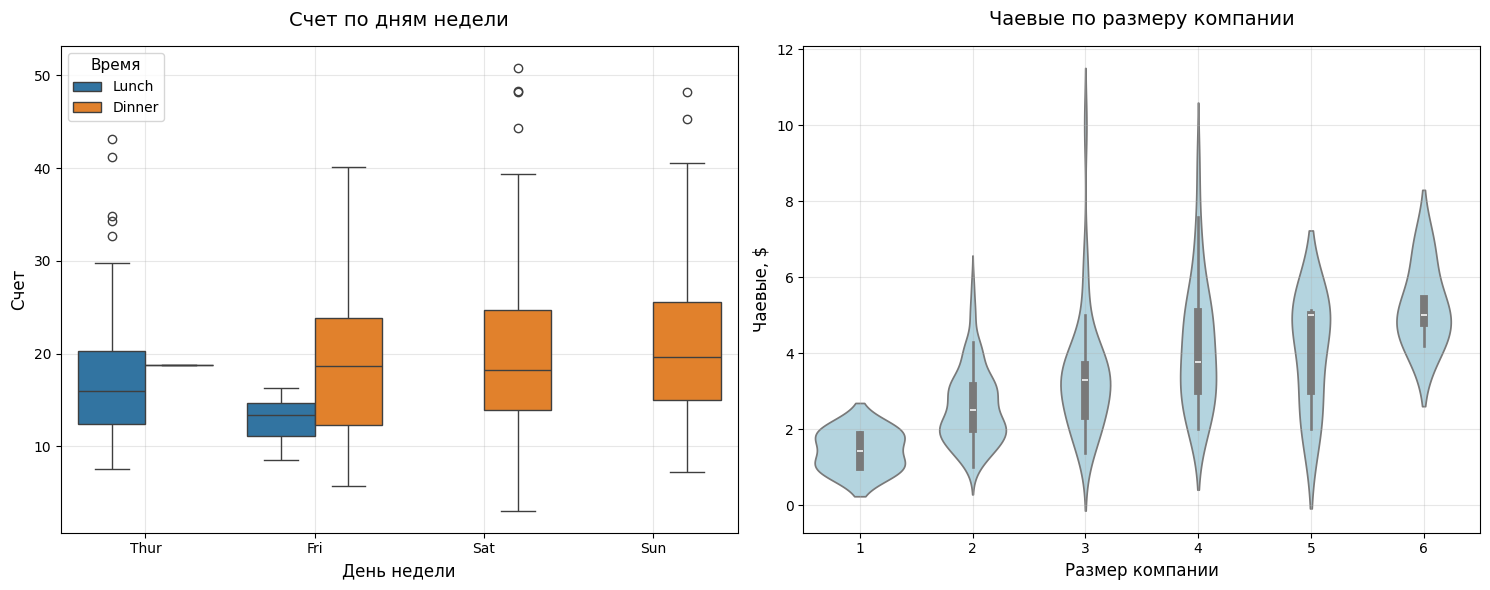

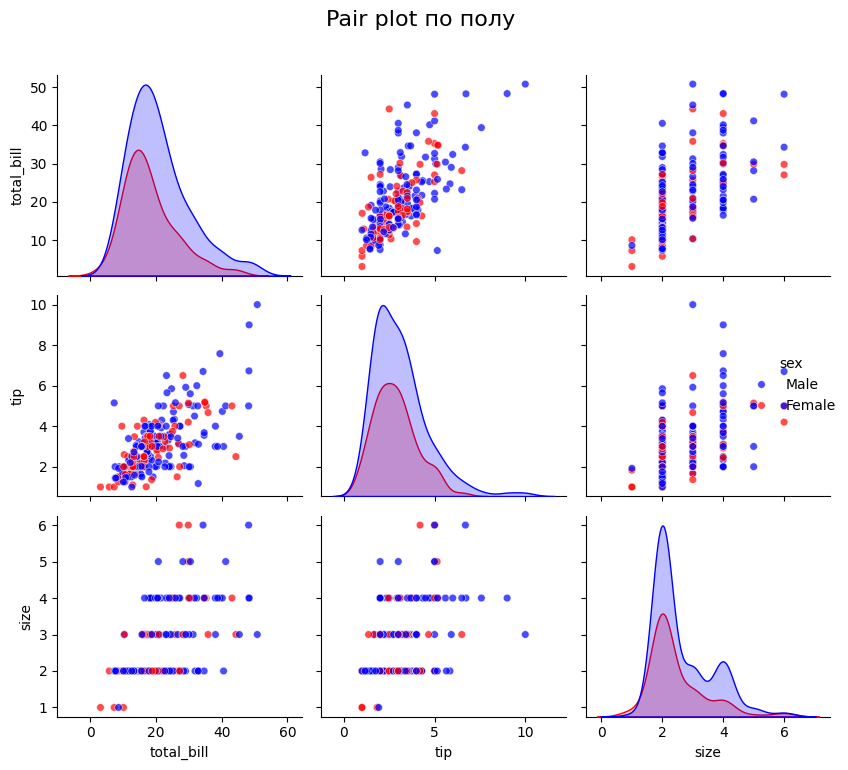

In [3]:
# Создайте 3 графика:
# 1. Box plot: total_bill по дням недели (day)
#    Разделите дополнительно по времени (time) с помощью hue
# 2. Violin plot: tip в зависимости от размера компании (size)
# 3. Pair plot: выберите 4 числовых признака, раскрасьте по полу (sex)

import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем датасет
tips = sns.load_dataset('tips')

# Создаем фигуру для графиков
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Box plot: total_bill по дням с разделением по времени
# data=tips, x='day', y='total_bill', hue='time'
ax1 = axes[0]
sns.boxplot(data=tips, x='day', y='total_bill', hue='time', ax=ax1)
ax1.set_title('Счет по дням недели', fontsize=14, pad=15)
ax1.set_xlabel('День недели', fontsize=12)
ax1.set_ylabel('Счет', fontsize=12)
ax1.legend(title='Время', title_fontsize=11)
ax1.grid(True, alpha=0.3)

# 2. Violin plot: tip по размеру компании
# x='size', y='tip'
ax2 = axes[1]
sns.violinplot(data=tips, x='size', y='tip', ax=ax2, color='lightblue')
ax2.set_title('Чаевые по размеру компании', fontsize=14, pad=15)
ax2.set_xlabel('Размер компании', fontsize=12)
ax2.set_ylabel('Чаевые, $', fontsize=12)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Pair plot: 4 числовых признака, раскраска по полу
# tips[['total_bill', 'tip', 'size', 'sex']]
# Создаем отдельную фигуру для pair plot
pair_plot = sns.pairplot(
    tips[['total_bill', 'tip', 'size', 'sex']],
    hue='sex',
    palette={'Male': 'blue', 'Female': 'red'},
    height=2.5,
    aspect=1.0,
    plot_kws={'alpha': 0.7, 's': 30}
)
pair_plot.fig.suptitle('Pair plot по полу', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()